In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore

In [ ]:
df = pd.read_csv('/content/synthetic_wire_quality_dataset.csv', encoding='ISO-8859-1')
df.head(5)

,Temperature (°C),Tension (N/m²),Diameter (MM),Wire_Quality
0,232.322026,246.712088,1.248268,Defective
1,257.278405,219.049672,0.680203,Defective
2,240.414506,127.439836,0.889023,Good
3,231.732477,241.011013,0.537600,Defective
4,213.548220,192.878419,0.511788,Good


We remove the degree symbol in our temperature
 column

In [ ]:
df = df.replace('°', '', regex=True)
#save the new dataset without the symbol
df.to_csv('/content/sample_data/synthetic_wire_quality_dataset.csv', index=False)
df.head(5)


,Temperature (°C),Tension (N/m²),Diameter (MM),Wire_Quality
0,232.322026,246.712088,1.248268,Defective
1,257.278405,219.049672,0.680203,Defective
2,240.414506,127.439836,0.889023,Good
3,231.732477,241.011013,0.537600,Defective
4,213.548220,192.878419,0.511788,Good


In [ ]:
#finding null values
df.isnull()

,Temperature (°C),Tension (N/m²),Diameter (MM),Wire_Quality
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
4995,False,False,False,False
4996,False,False,False,False
4997,False,False,False,False
4998,False,False,False,False


In [ ]:
#here we fill the missing values (numerical) with the mean of respective columns
df.fillna(df.mean(numeric_only=True), inplace=True)


In [ ]:
#finding whether there are null values in the table after filling with default mean of that column
df.isnull()

,Temperature (°C),Tension (N/m²),Diameter (MM),Wire_Quality
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
4995,False,False,False,False
4996,False,False,False,False
4997,False,False,False,False
4998,False,False,False,False


In [ ]:
#Data transformaton using minMax scaler(first we encode categorical data)
from sklearn.preprocessing import MinMaxScaler
le = LabelEncoder()

df['Wire_Quality'] = le.fit_transform(df['Wire_Quality'])

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)


In [ ]:
#check for outliers
df_zscore = df.apply(zscore)
outliers = df_zscore[(df_zscore > 3).any(axis=1)]
print(outliers)


Empty DataFrame
Columns: [Temperature (°C), Tension (N/m²), Diameter (MM), Wire_Quality]
Index: []


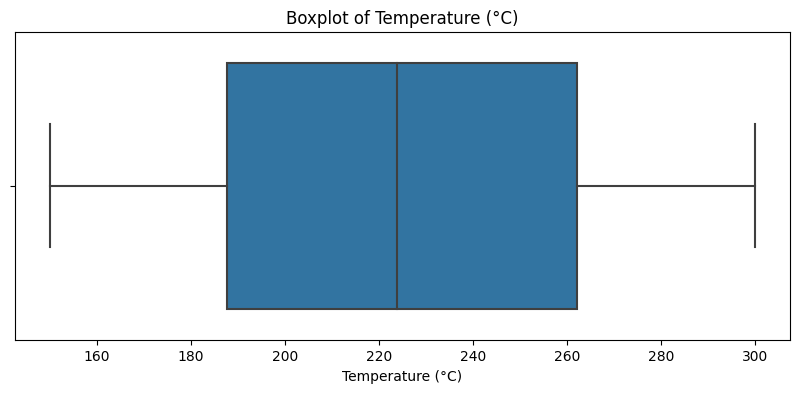

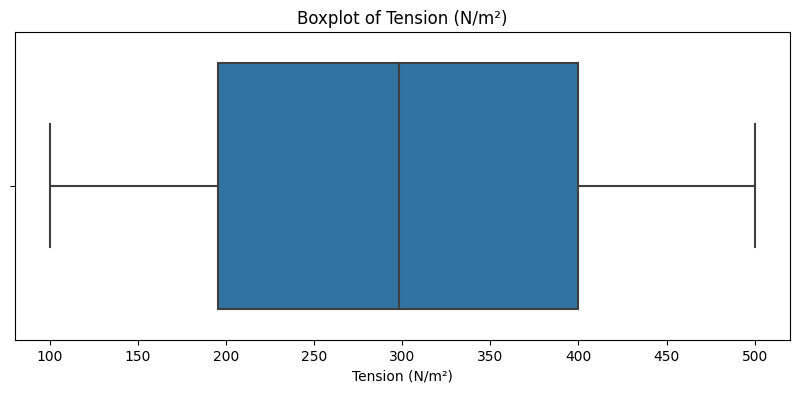

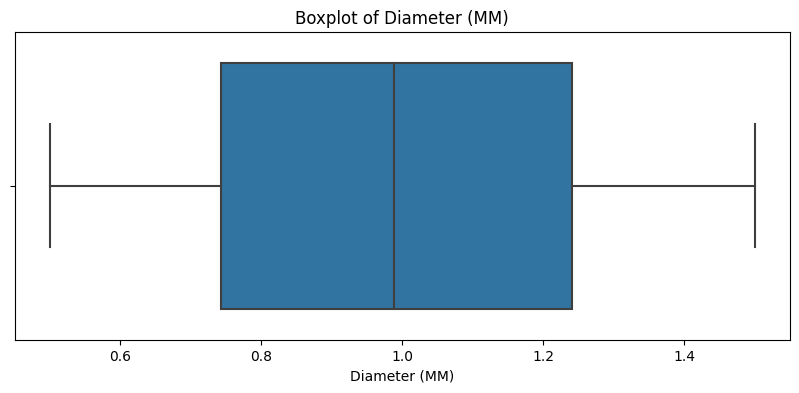

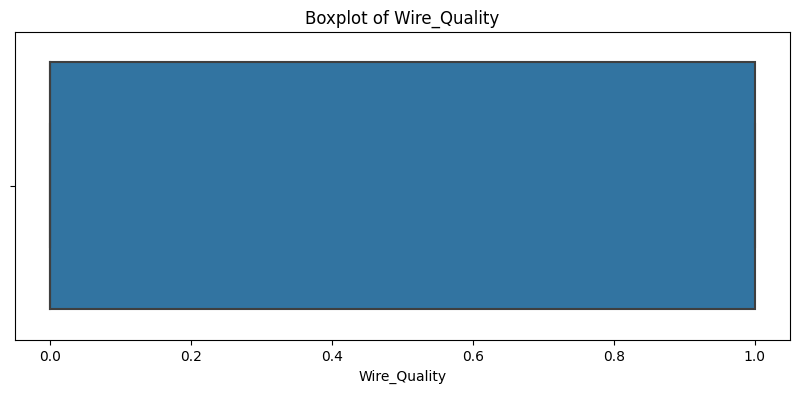

In [ ]:
#Box plot to show outliers
for column in df.columns:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()


Describing the properties of the table

In [ ]:
df.describe()


,Temperature (°C),Tension (N/m²),Diameter (MM),Wire_Quality
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,224.545634,298.378756,0.990627,0.493000
std,43.371185,116.038883,0.288774,0.500001
min,150.010867,100.060152,0.500166,0.000000
25%,187.639905,195.461207,0.743306,0.000000
50%,223.859457,298.014497,0.988506,0.000000
75%,262.109600,399.555646,1.241497,1.000000
max,299.994603,499.991181,1.499962,1.000000


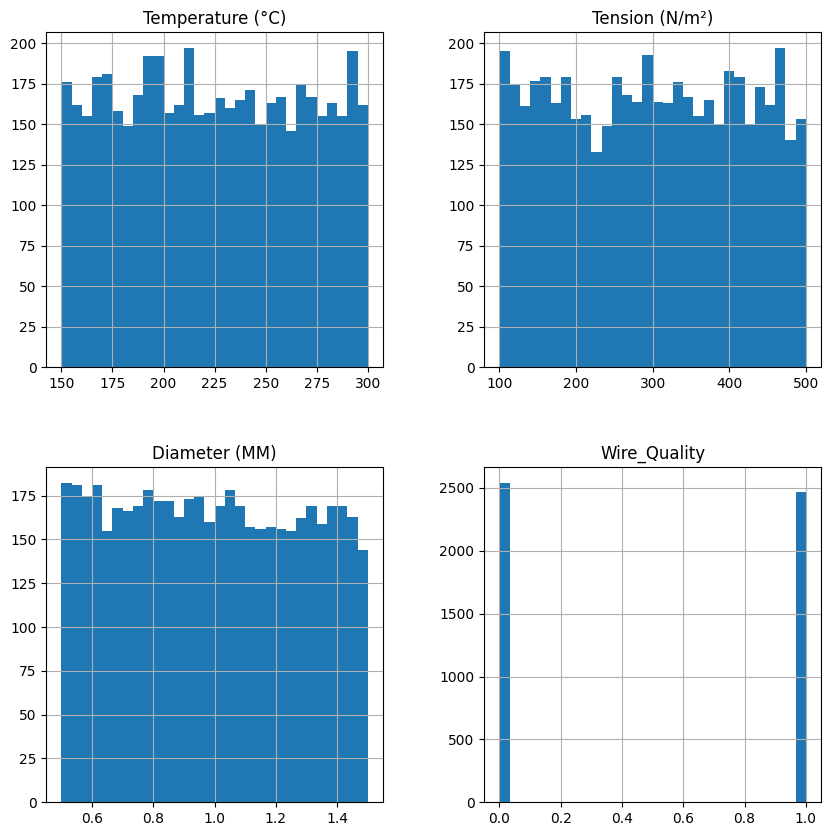

In [ ]:
#plotting the histogram for each colmn in the dataset
import matplotlib.pyplot as plt

df.hist(bins=30, figsize=(10, 10))
plt.show()


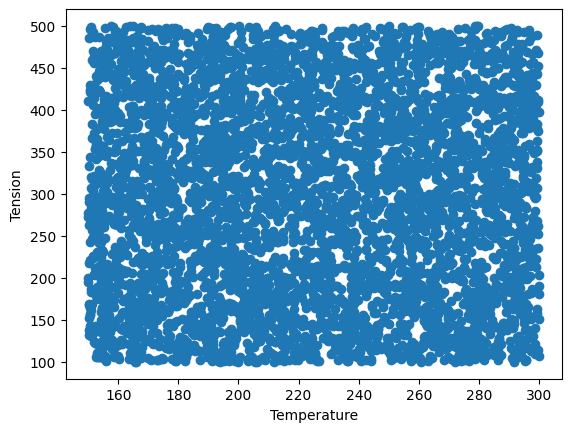

In [ ]:
#graph plot between temperature and tension
plt.scatter(df['Temperature (°C)'], df['Tension (N/m²)'])
plt.xlabel('Temperature')
plt.ylabel('Tension')
plt.show()


Feature Engineering

In [ ]:
#finding the relation between each coulmn in the column
df.corr()

,Temperature (°C),Tension (N/m²),Diameter (MM),Wire_Quality
Temperature (°C),1.000000,0.001034,0.003296,0.015871
Tension (N/m²),0.001034,1.000000,0.011347,-0.002010
Diameter (MM),0.003296,0.011347,1.000000,0.020627
Wire_Quality,0.015871,-0.002010,0.020627,1.000000


In [ ]:
#correlation matrix
corr_matrix = df.corr()
print(corr_matrix)


                  Temperature (°C)  Tension (N/m²)  Diameter (MM)  \
Temperature (°C)          1.000000        0.001034       0.003296   
Tension (N/m²)            0.001034        1.000000       0.011347   
Diameter (MM)             0.003296        0.011347       1.000000   
Wire_Quality              0.015871       -0.002010       0.020627   

                  Wire_Quality  
Temperature (°C)      0.015871  
Tension (N/m²)       -0.002010  
Diameter (MM)         0.020627  
Wire_Quality          1.000000  


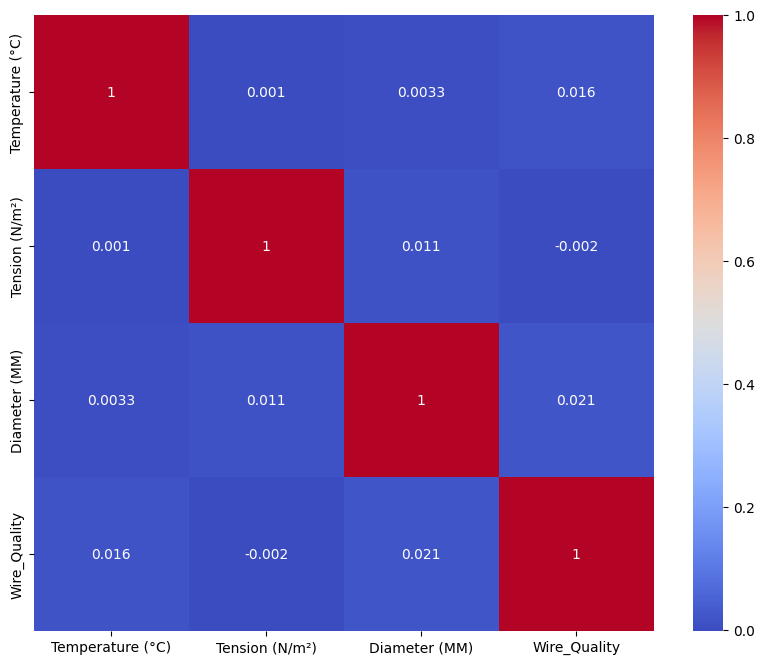

In [ ]:
# heatmap to visualize correlation
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


#Model selection


Splitting the training(80%) and testing(20%) data

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop('Wire_Quality', axis=1)
y = df['Wire_Quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
x1=X_train.head(20)
y1=y_train.head(20)
print(y1,x1)

4227    1
4676    0
800     0
3671    0
4193    1
2968    0
4793    0
4368    1
2776    0
2970    1
3867    1
1743    0
3948    1
3802    0
2024    0
2274    0
99      1
4921    1
3407    1
4245    1
Name: Wire_Quality, dtype: int64       Temperature (°C)  Tension (N/m²)  Diameter (MM)
4227        257.246449      415.629548       1.015412
4676        156.370380      321.538336       0.523348
800         155.998920      474.963029       0.770570
3671        296.370553      420.126227       0.575700
4193        238.663794      349.802856       1.437958
2968        170.219245      191.798939       1.028894
4793        188.598705      266.625353       1.001927
4368        213.408329      466.449689       1.283015
2776        265.671915      480.665142       0.653538
2970        202.655205      142.655860       0.659007
3867        231.123828      245.070997       1.169638
1743        264.288977      387.063571       0.671866
3948        167.567680      366.715601       0.819517
3802       

# Support Vector Machine


In [ ]:
from sklearn.svm import SVC

#SVM model
svm = SVC()
# Train the model
svm.fit(X_train, y_train)
# Make predictions on the test set
y_pred_svm = svm.predict(X_test)
print(y_pred_svm)


[1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1
 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0
 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0
 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 

Metrics for the Support Vector Machine model

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics for the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

print('Support vector machine:')
print('Accuracy=',accuracy_svm)
print('Precision=',precision_svm)
print('Recall=',recall_svm)
print('F1 Score=',f1_svm)


Support vector machine:
Accuracy= 0.514
Precision= 0.4891304347826087
Recall= 0.18672199170124482
F1 Score= 0.2702702702702703


SVC with linear kernel decision boundary plotting

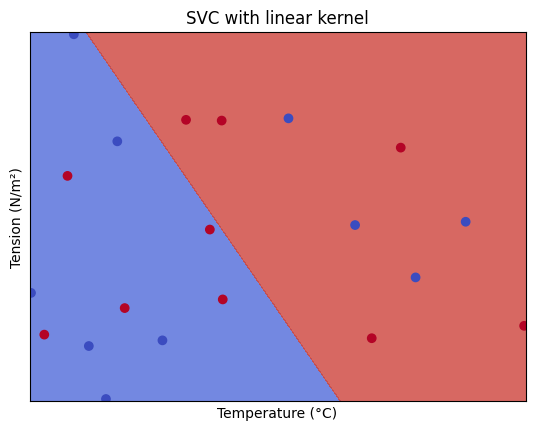

In [ ]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC

#SVM model
svm = SVC(kernel='linear', C=1.0)


pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(x1)

#X_train_pca with features reduced to 2 dimensions
svm.fit(X_train_pca, y1)
h = .02  #mesh step size

#here we create a mesh to plot in
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

#point in the mesh [x_min, x_max]x[y_min, y_max].
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])

#place result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

#Plot also the training points
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y1, cmap=plt.cm.coolwarm)
plt.xlabel('Temperature (°C)')
plt.ylabel('Tension (N/m²)')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('SVC with linear kernel')

plt.show()



Plot showing the decision boundary using Temperature (°C)' and Tension (N/m²) features

K-Nearest Neighbors (K-NN):

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#K-NN model
knn = KNeighborsClassifier()

# Train the model
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn.predict(X_test)
print(y_pred_knn)

Metrics for the KNN model

In [ ]:
# Calculate metrics for the K-NN model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
print('KNN:')
print('Accuracy=',accuracy_knn)
print('Precision=',precision_knn)
print('Recall=',recall_knn)
print('F1 Score=',f1_knn)

KNN:
Accuracy= 0.497
Precision= 0.47904191616766467
Recall= 0.4979253112033195
F1 Score= 0.4883011190233978


KNN decision boundary plotting

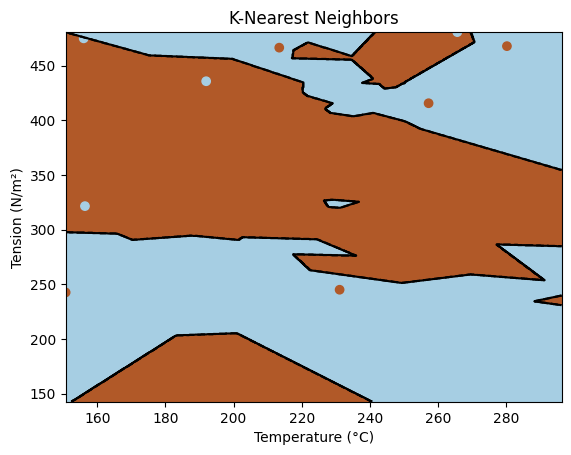

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize a K-NN classifier
knn = KNeighborsClassifier()

# Train the classifier using the original features and feature names
knn.fit(x1, y1)
h=0.2
# Use original feature names when creating the meshgrid
l = ['Temperature (°C)', 'Tension (N/m²)', 'Diameter (MM)']
xx, yy = np.meshgrid(np.arange(x1[l[0]].min(), x1[l[0]].max(), h),
                     np.arange(x1[l[1]].min(), x1[l[1]].max(), h))

# Create a DataFrame for the meshgrid with appropriate feature names
meshgrid_df = pd.DataFrame({'Temperature (°C)': xx.ravel(), 'Tension (N/m²)': yy.ravel(), 'Diameter (MM)': 0})

# Plot the decision boundary
Z = knn.predict(meshgrid_df)
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z > 0, cmap=plt.cm.Paired)
plt.contour(xx, yy, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'], levels=[-.5, 0, .5])

# Plot training points
plt.scatter(x1['Temperature (°C)'], x1['Tension (N/m²)'], c=y1, cmap=plt.cm.Paired)
plt.xlabel('Temperature (°C)')
plt.ylabel('Tension (N/m²)')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('K-Nearest Neighbors')

plt.show()


Plot showing the decision boundary using Temperature (°C)' and Tension (N/m²) features

# Random Forest:

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest model
rf = RandomForestClassifier()

# Train the model
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf.predict(X_test)


Metrics for the Random forest model

In [ ]:
# Calculate metrics for the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
print('Random forest:')
print('Accuracy=',accuracy_rf)
print('Precision=',precision_rf)
print('Recall=',recall_rf)
print('F1 Score=',f1_rf)

Random forest:
Accuracy= 0.517
Precision= 0.49892008639308855
Recall= 0.47925311203319504
F1 Score= 0.4888888888888889


Random forest decision boundary plotting

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


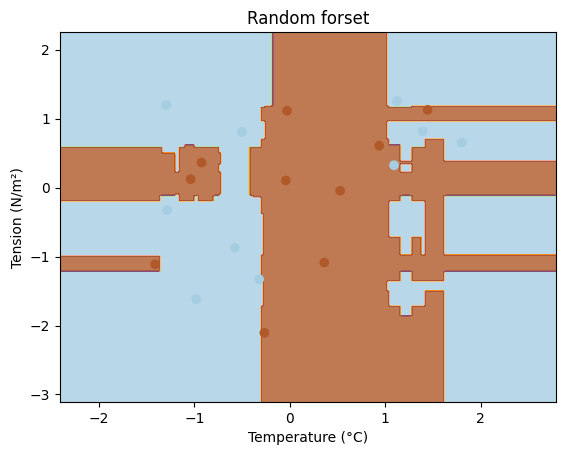

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
x1_scaled = scaler.fit_transform(x1)

# Initialize random forest model
nb = RandomForestClassifier()


# Train the model
nb.fit(x1_scaled, y1)

# Create a meshgrid for visualization
h = .02  # mesh step size
x_min, x_max = x1_scaled[:, 0].min() - 1, x1_scaled[:, 0].max() + 1
y_min, y_max = x1_scaled[:, 1].min() - 1, x1_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Explicitly set the feature names
feature_names = ['Temperature (°C)', 'Tension (N/m²)', 'Diameter (MM)']
meshgrid_df = pd.DataFrame(np.c_[xx.ravel(), yy.ravel(), np.zeros_like(xx.ravel())], columns=feature_names)

# Predict on the meshgrid
Z = nb.predict(meshgrid_df[feature_names])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

# Plot training points
plt.scatter(x1_scaled[:, 0], x1_scaled[:, 1], c=y1, cmap=plt.cm.Paired)
plt.xlabel('Temperature (°C)')
plt.ylabel('Tension (N/m²)')
plt.title('Random forset')

plt.show()


Plot showing the decision boundary using Temperature (°C)' and Tension (N/m²) features

# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

#Naive Bayes model
nb = GaussianNB()

# Train the model
nb.fit(X_train, y_train)

# Make predictions on the test set
y_pred_nb = nb.predict(X_test)


Metrics for the Naive Bayes model

In [ ]:
#here we calculate metrics for the Naive Bayes model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)

print('Naive Bayes:')
print('Accuracy=',accuracy_nb)
print('Precision=',precision_nb)
print('Recall=',recall_nb)
print('F1 Score=',f1_nb)

Naive Bayes:
Accuracy= 0.52
Precision= 0.5026178010471204
Recall= 0.3983402489626556
F1 Score= 0.4444444444444444


Naves bayes decision boundary plotting

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


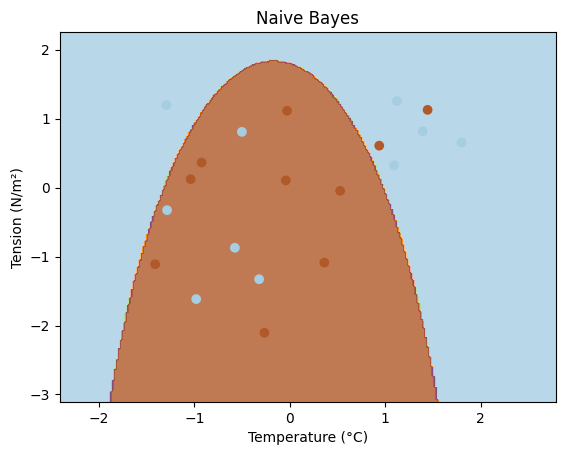

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
x1_scaled = scaler.fit_transform(x1)

# Initialize Naive Bayes model
nb = GaussianNB()

# Train the model
nb.fit(x1_scaled, y1)

# Create a meshgrid for visualization
h = .02  # mesh step size
x_min, x_max = x1_scaled[:, 0].min() - 1, x1_scaled[:, 0].max() + 1
y_min, y_max = x1_scaled[:, 1].min() - 1, x1_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Explicitly set the feature names
feature_names = ['Temperature (°C)', 'Tension (N/m²)', 'Diameter (MM)']
meshgrid_df = pd.DataFrame(np.c_[xx.ravel(), yy.ravel(), np.zeros_like(xx.ravel())], columns=feature_names)

# Predict on the meshgrid
Z = nb.predict(meshgrid_df[feature_names])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

# Plot training points
plt.scatter(x1_scaled[:, 0], x1_scaled[:, 1], c=y1, cmap=plt.cm.Paired)
plt.xlabel('Temperature (°C)')
plt.ylabel('Tension (N/m²)')
plt.title('Naive Bayes')

plt.show()


Plot showing the decision boundary using Temperature (°C)' and Tension (N/m²) features

Conclusion:

Machine learning model are successfully built to predict whether wire quality is good or defective. From the proposed models SVM(0.514), KNN(0.497), random forest(0.504) and navies bayes we have achieved highest accuracy using Navies bayes model with 0.52.